# Datasets

Raw data often requires significant processing before it can be used effectively in machine learning models.

## Data processing

The most common stages of **data processing** are:

* data collection
* data cleaning
    * handling missing values
    * remove duplicates
    * outlier detection
    * data type conversion and standardization
* data exploration and visualization
* feature engineering
    * encoding categorical variables (e.g., {ref}`OHE`)
    * converting continuous variables into categorical bins (**binning/discretization**)
    * $\log$ transformations
* data annotation (if needed)
* data augmentation (optional)

The result of these manipulations is what is usually called a **dataset**: a specific collection of data that is organized and structured in a way that makes it suitable for analysis, processing, or machine learning tasks. 

```{note}
Most examples of datasets in this book have been already carefully prepared and usually do not require much preprocessing. In real life, however, the data preprocessing stage is typically the most crucial and time-consuming stage of ML pipeline.
```

(feature-matrix)=
## Feature matrix

A tabular numerical dataset can be represented as a **feature matrix** (or **design matrix**) $\boldsymbol X$ of shape $n\times d$ where 

* $n$ — number of samples (rows)
* $d$ — number of features (columns)

Each sample $\boldsymbol x_i$ is therefore represented by $i$-th row of the feature matrix $\boldsymbol X$:

$$
    \boldsymbol X = \begin{pmatrix}
    \boldsymbol x_1^{\mathsf T} \\
    \boldsymbol x_2^{\mathsf T} \\
    \vdots \\
    \boldsymbol x_n^{\mathsf T}
    \end{pmatrix} = 
    \begin{pmatrix}
    x_{11} & x_{12} & \cdots & x_{1d} \\
    x_{21} & x_{22} & \cdots & x_{2d}\\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \cdots & x_{nd}
    \end{pmatrix}
$$

(here $x_{ij}$ is $j$-th feature of $i$-th object).

```{important}
A sample $\boldsymbol x_i$ is a row vector with $d$ coordinates. However, in linear algebra a vector is by default a column vector. That's why in vector-matrix operations a training sample is often denoted as $\boldsymbol x_i^{\mathsf T}$ to emphasize that it is a row.
```

(iris)=
## Example: [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [7]:
from sklearn.datasets import load_iris
iris_data = load_iris(as_frame=True)
iris_data['data']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3



In this dataset there are $n=150$ samples and $d=4$ features; each flower is represented by a $4$-dimensional vector, e.g.

$$
    \boldsymbol x_1^{\mathsf T} = (5.1, 3.5, 1.4, 0.3).
$$


## Sources of datasets

### [sklearn.datasets](https://scikit-learn.org/stable/api/sklearn.datasets.html)

Scikit-learn provides access to several built-in datasets. This is how {ref}`Iris <Iris>` dataset was obtained. `sklearn.datasets` also allows to create synthetic datasets:

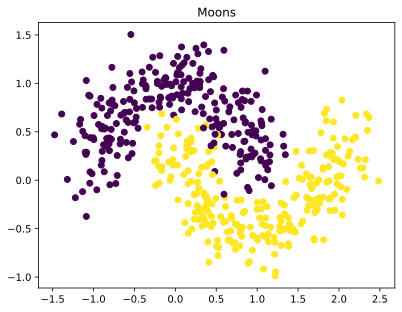

In [17]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
colors = ['r','b']
plt.scatter(X[:, 0], X[:,1], c=y)
plt.title("Moons");

Another example - classical dataset of [handwritten digits](http://yann.lecun.com/exdb/mnist/):

In [33]:
from sklearn.datasets import fetch_openml

X, Y = fetch_openml('mnist_784', return_X_y=True, parser='auto')
X.shape, Y.shape

((70000, 784), (70000,))

In [34]:
import matplotlib.pyplot as plt
import numpy as np

X = X.astype(float).values / 255
Y = Y.astype(int).values

def plot_digits(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        # plt.imshow(train_images[i], cmap=plt.cm.binary)
        if y_pred is None:
            title = str(y_true[indices[i]])
        else:
            title = f"y={y_true[indices[i]]}, ŷ={y_pred[indices[i]]}"
        plt.title(title, size=20)
    plt.show()

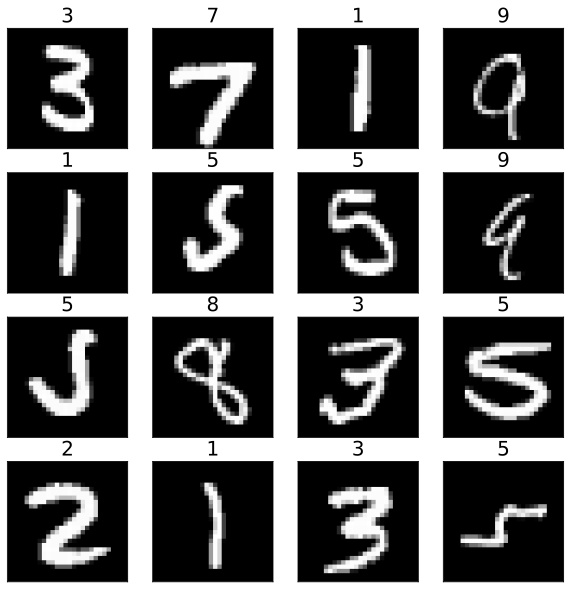

In [35]:
plot_digits(X, Y, random_state=12)

### Kaggle datasets

[Kaggle](https://www.kaggle.com) is an online platform that serves as a hub for data science and machine learning practitioners. It provides a range of resources, competitions, and community engagement opportunities. Kaggle hosts a large [repository](https://www.kaggle.com/datasets) of datasets on a wide range of topics, freely available for download.

```{note}
To fetch datasets from kaggle one needs to obtain an API token from Kaggle and place it in the `.kaggle/kaggle.json` file.
```

For example, download [MATH dataset](https://www.kaggle.com/datasets/mathurinache/math-dataset/data):

In [36]:
import kaggle
!kaggle datasets download -d mathurinache/math-dataset -p ../datasets

Dataset URL: https://www.kaggle.com/datasets/mathurinache/math-dataset
License(s): CC-BY-NC-SA-4.0
 99%|█████████████████████████████████████▋| 7.00M/7.07M [00:01<00:00, 5.93MB/s]
100%|██████████████████████████████████████| 7.07M/7.07M [00:01<00:00, 4.39MB/s]


This is a text dataset, it is stored in `json` files:

In [58]:
import json
from pathlib import Path

problems = []
for p in Path("../datasets/MATH/train/algebra/").rglob("*.json"):
    with open(p) as f:
        problems.append(json.load(f))

print("Total problems:", len(problems))
problems[2]

Total problems: 1744


{'problem': 'If $\\sqrt{2\\sqrt{t-2}} = \\sqrt[4]{7 - t}$, then find $t$.',
 'level': 'Level 4',
 'type': 'Algebra',
 'solution': 'We raise both sides to the fourth power, which is equivalent to squaring twice, in order to get rid of the radicals. The left-hand side becomes $$\\left(\\sqrt{2\\sqrt{t-2}}\\right)^4 = \\left(2\\sqrt{t-2}\\right)^2 = 4 \\cdot (t-2) = 4t-8.$$The right-hand side becomes $\\left(\\sqrt[4]{7-t}\\right)^4 = 7-t$. Setting them equal, $$4t-8 = 7-t \\quad\\Longrightarrow\\quad 5t = 15,$$and $t = \\boxed{3}$.  Checking, we find that this value does indeed satisfy the original equation.'}

### Other resources

* [Google dataset search](https://datasetsearch.research.google.com/)
* [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/)
* [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html)
* [NLTK data](https://www.nltk.org/data.html)

## Exercises

1. What is the shape of the feature matrix of MNIST dataset?

2. A dataset contains $10$ features. Six of them are numeric, the rest four are categorical with $2$, $3$, $5$ and 9 categories respectively. How many features will be in this dataset after {ref}`one-hot encoding <OHE>` with/without dropping?